In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
#load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
import os

In [4]:
os.chdir('E:\Python')

In [5]:
os.getcwd()

'E:\\Python'

In [6]:
#load the dataset
CardFit = pd.read_csv('CardioGoodFitness.csv')

In [9]:
#check the shape of the data
CardFit.shape

(180, 9)

In [10]:
#make a copy of the data since there are only 180 observations
CardFit1 = CardFit.copy()

In [11]:
#check the first five records of data
CardFit1.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [12]:
#Checking the data type of each column
CardFit1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


Observation: The data types all look correct but we will change the object data type to categorical since they are categories

In [13]:
#Changing the object data types into categorical
CardFit1['Product'] = CardFit1.Product.astype('category')
CardFit1['Gender'] = CardFit1.Gender.astype('category')
CardFit1['MaritalStatus'] = CardFit1.MaritalStatus.astype('category')

In [14]:
#checking the new data types
CardFit1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.4 KB


These are the correct data types to work with.

In [15]:
#Now we will view a summary stats table of our columns
CardFit1.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


Observation: We see that the dependent variable shows three unique values.

In [18]:
#Viewing the unique values of Product column
CardFit1['Product'].unique()

['TM195', 'TM498', 'TM798']
Categories (3, object): ['TM195', 'TM498', 'TM798']

In [20]:
#Checking our data for null values
CardFit1.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

Observation: Since we have no null values in our data, neither imputation nor dropping of records is nescessary.

# EDA - Univariate Numerical Variables
We have finished our preprocessing and now we can begin the EDA portion.

We will begin with univariate analysis of our numerical columns (age, education, usage, fitness, income, miles). We want to know the central tendency and dispersion. We will use a histogram and box plot to gain more perspective.

In [34]:
#To make the analysis easier we will create a function for a histogram and box plot for easier and cleaner code.
#This code was taught in the Uber Case Study mentor session.
def hist_box(feature, figsize=(15,10), bins = None):
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # 2 rows in subplot grid
                                          sharex = True, # sharing the x-axis with both subplots
                                          gridspec_kw = {"height_ratios": (.25, .75)}, # boxplot will take of 25% of canvass and the histogram with take up 75%
                                          figsize = figsize
                                          )
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # create the boxplot and add triangle to represent the mean
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2)
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # adding dashed mean line to histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # adding median line to histogram

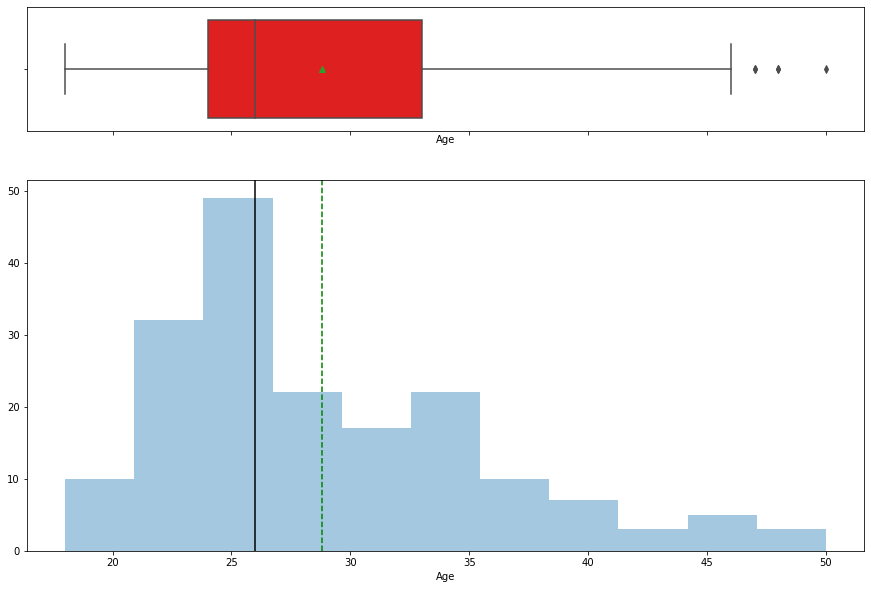

In [35]:
#Showing the box plot and histogram of Age variable
hist_box(CardFit1.Age)

Observation:
The median age is about 26 years and mean age is about 28 years.
50 percent of our observations seem to fall within a ten year window around 24-34 years.
Slightly skewed to the right.

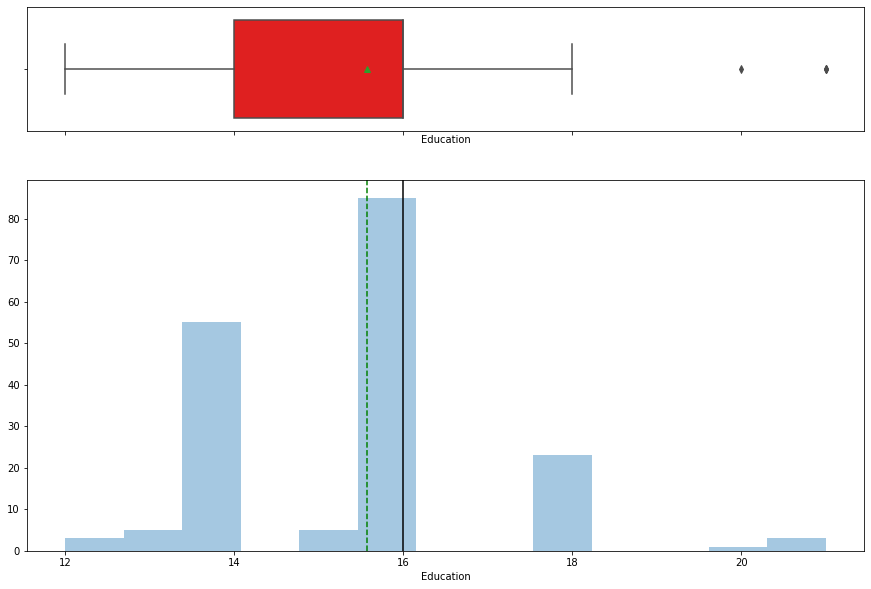

In [36]:
hist_box(CardFit1.Education)

Observation:
Most of our customers have between 2-4 years of higher education.

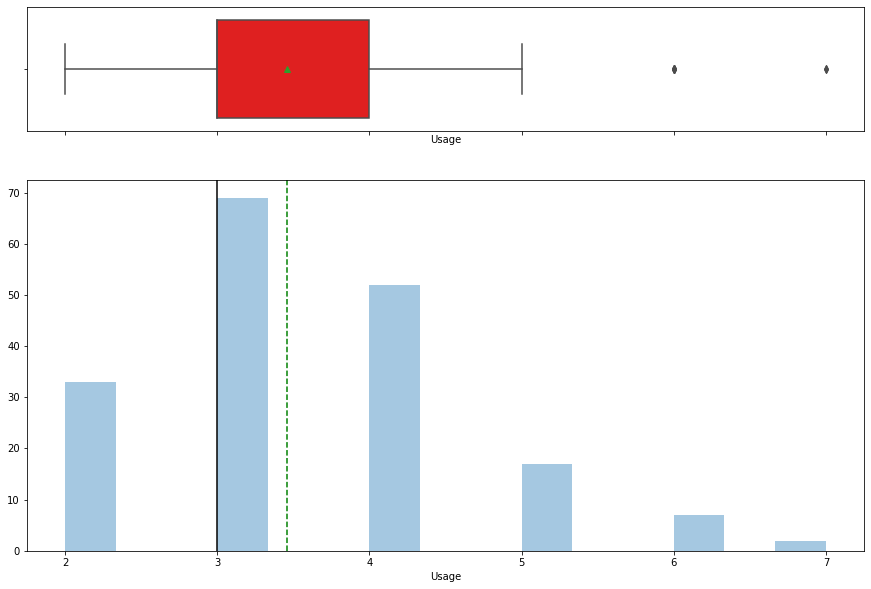

In [37]:
hist_box(CardFit1.Usage)

Observation:
Most of the customers intend to use the product 3-4 times per week.
Slighty right skewed.
This seems to suggest that our customers are either exercising without our product at least partially during the week or are "non-extreme" athletes.

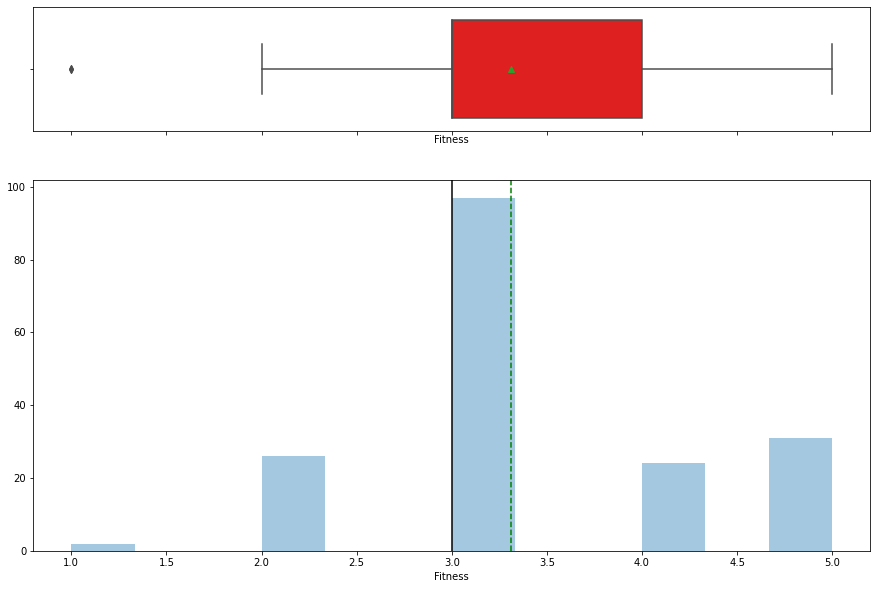

In [38]:
hist_box(CardFit1.Fitness)

Observation:
Close to 100 out of our 180 customers, self-idnetify as being perfectly between 1-very unfit and 5-very fit.
This observation seems to match the same observation for usage, in terms of "non-extreme" athletes.

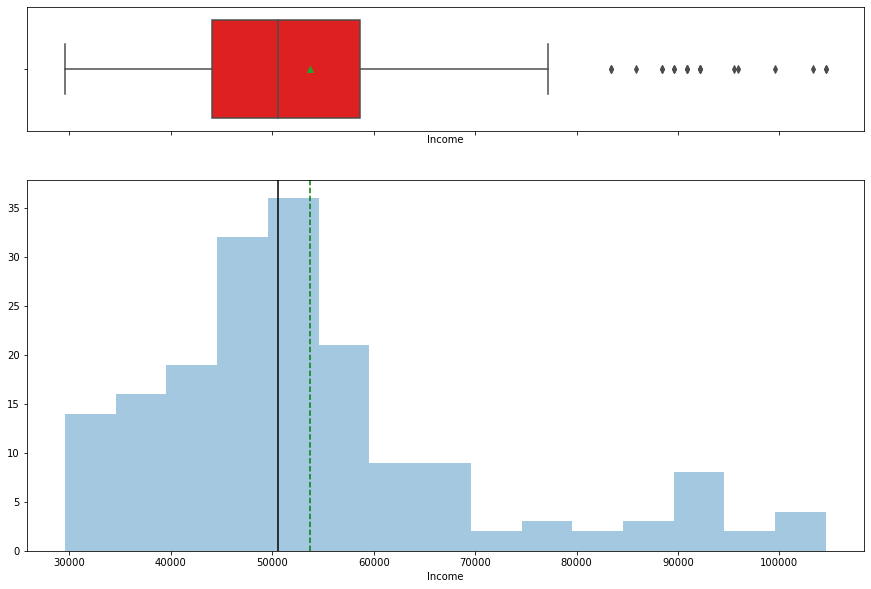

In [39]:
hist_box(CardFit1.Income)

Observations:
IQR falls between roughly 44,000 and 59,000 dollars.
Distribution seems to follow a fairly normal curve, although there is some slight right skewness. This can also be seen by the high number of outliers in the box plot.

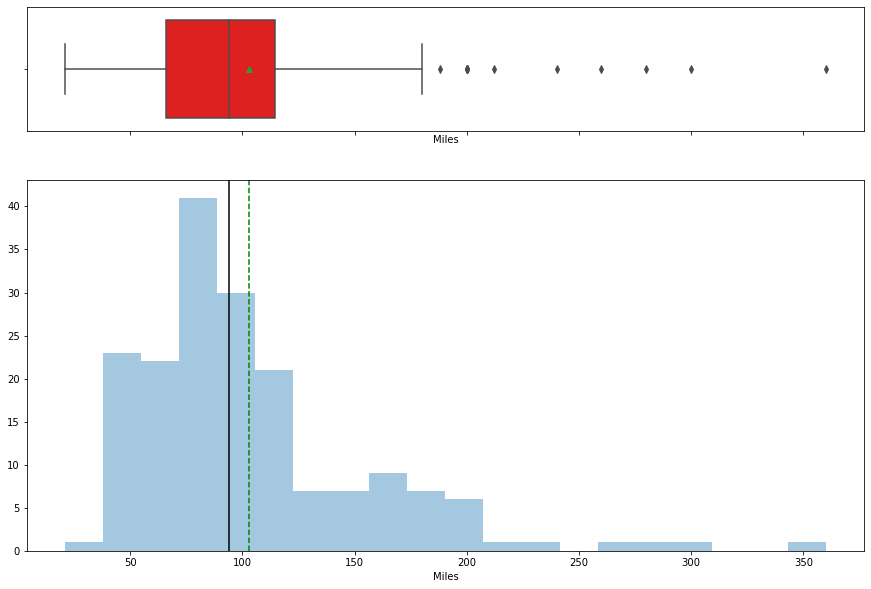

In [40]:
hist_box(CardFit1.Miles)

Observations:
Most customers (50%) expect to run between 65 and 110 miles.
The distribution follows a fairly normal curve.
We do seem to have some "extreme" athletes as the histogram skews to the right, also seen with the ouliers in the boxplot.

# EDA - Univariate Categorical Variables
We will now observe the three variables of Product, Gender and MaritalStatus. We again will create a function, as was done in Uber Case Study to observe these variables. The chart that we will use is going to be a bar plot with percentage of each class, as was taught in the Uber Case Study.

In [47]:
#Creating our function
def bar_perc(plot, feature):
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percent of each class of the category
        x = p.get_x() + p.get_width() / 2 - .05 # width of the plot ( this was determined in the case study but the .05 value is found to be the best fit, it is possible that another value could work but trial and error is necessary to find that value)
        y = p.get_y() + p.get_height() # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percent

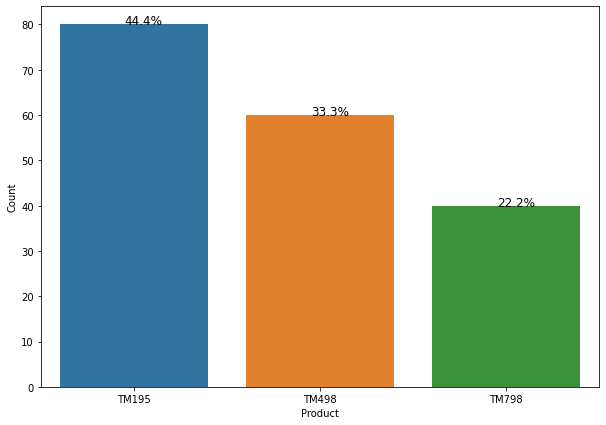

In [48]:
# Viewing Product
plt.figure(figsize=(10,7))
ax = sns.countplot(CardFit1['Product'])
plt.xlabel('Product')
plt.ylabel('Count')
bar_perc(ax,CardFit1['Product'])

Observations: TM195 made up 44.4% of sales, TM498 made up 33.3% of sales and TM798 made up 22.2% of sales.

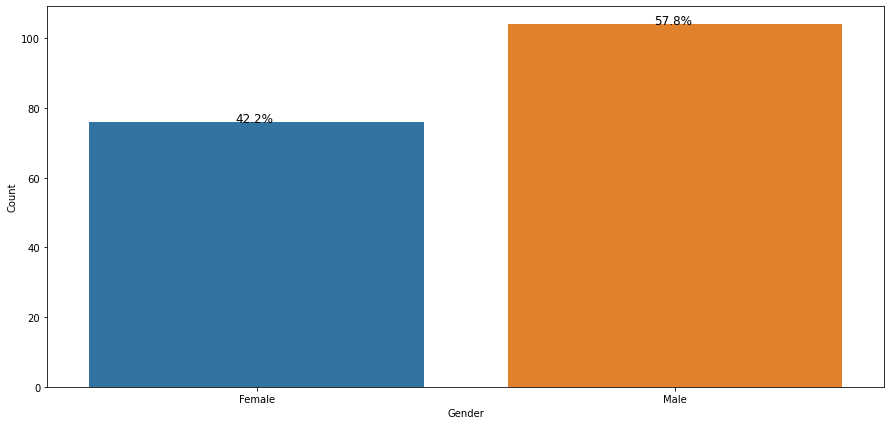

In [49]:
#Viewing Gender variable
plt.figure(figsize=(15,7))
ax = sns.countplot(CardFit1['Gender'])
plt.xlabel('Gender')
plt.ylabel('Count')
bar_perc(ax,CardFit1['Gender'])

Observation: 57.8% of customers are males and 42.2% are females.

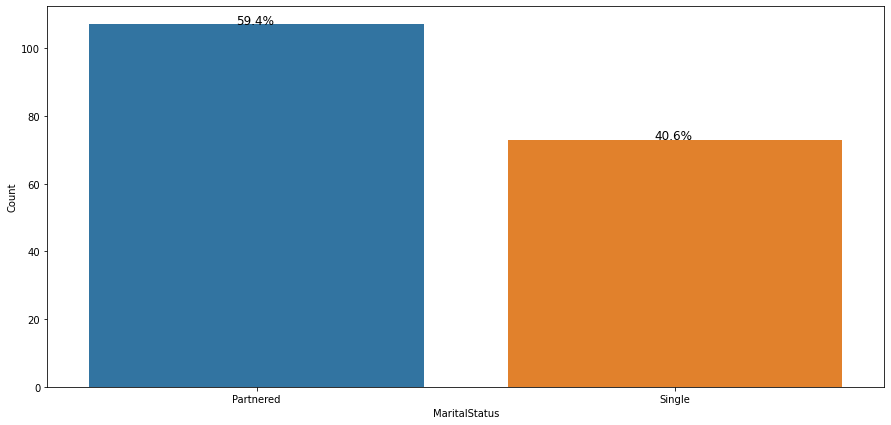

In [50]:
# Viewing MaritalStatus variable
plt.figure(figsize=(15,7))
ax = sns.countplot(CardFit1['MaritalStatus'])
plt.xlabel('MaritalStatus')
plt.ylabel('Count')
bar_perc(ax,CardFit1['MaritalStatus'])

Observation: 59.4% of customers are in a relationship, 40.6% of customers are single.

# EDA - Multivariate Analysis
Since our target variable is a categorical variable and not a numerical variable, we will not use correlation. Because we only have two other categorical variables (other than the dependent variable), we can use a countplot to gain some perspective on each of our three products and how they trend. This should be easy since each of our other categorical variables only have two classes each. We will look at how MaritalStatus and Gender behave for our three products first.

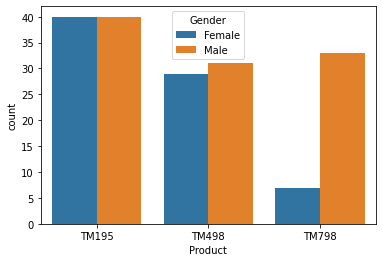

In [58]:
#Product vs Gender
sns.countplot(data = CardFit1, x='Product', hue='Gender');

Observations:
While Gender does not seem to be biased toward men or women for TM195 or TM498, the graph shows that TM798 has a much higher count of men using it than women. This can be helpful for targeting potential customers.

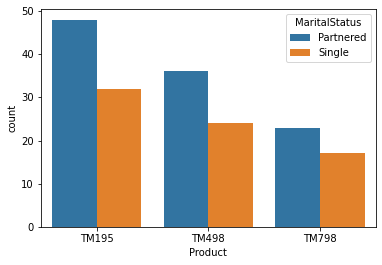

In [60]:
#Product vs MaritalStatus
sns.countplot(data = CardFit1, x='Product', hue='MaritalStatus');

Observation:
It seems that for all the TM models, partnered customers still are a larger portion of users. Because of this, we could possibly deduct that a target audience across all TM models is likely to be those in a relationship.

Now let's see how the Product variable is vs our numerical categories.

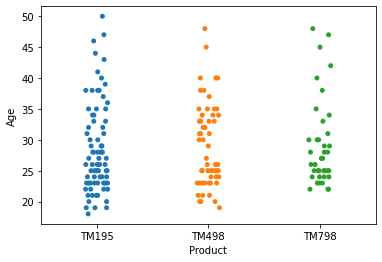

In [63]:
#Product vs Age
sns.stripplot(data = CardFit1, x='Product', y='Age', jitter=True);

Observations: Age does not seem to indicate anything with the exception of TM798. There are no customers for this product <20 years old.

<AxesSubplot:xlabel='Product', ylabel='Education'>

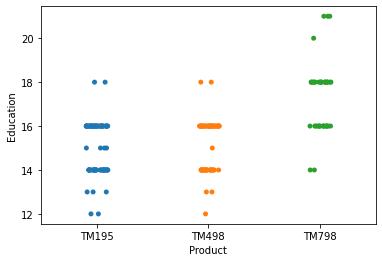

In [64]:
#Product vs Education
sns.stripplot(data = CardFit1, x='Product', y='Education', jitter=True)

Observations: It seems as though the education level is the same for TM195 and TM498. TM798 is more likely to be used by higher educated people. Because education and income are often correlated, let's view income levels.

<AxesSubplot:xlabel='Product', ylabel='Income'>

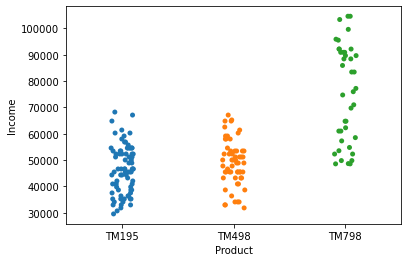

In [65]:
#Product vs Income
sns.stripplot(data = CardFit1, x='Product', y='Income', jitter=True)

Obsevations:Just as expected the higher incomes are more likely to purchase the TM798.

<AxesSubplot:xlabel='Product', ylabel='Usage'>

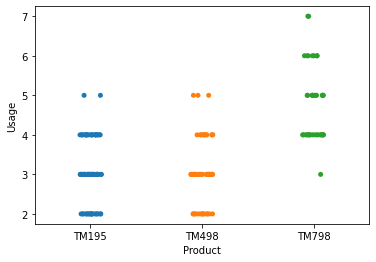

In [66]:
#Product vs Usage
sns.stripplot(data = CardFit1, x='Product', y='Usage', jitter=True)

Observations: It also seems as though the customers who intend to use the TM model more will increasingly be more likely to have a TM798, whereas the TM195 and TM498 are about even.

<AxesSubplot:xlabel='Product', ylabel='Fitness'>

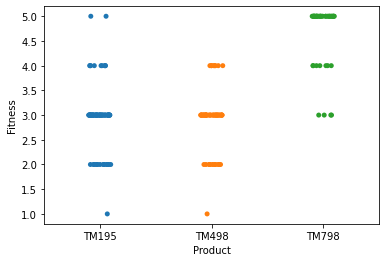

In [67]:
#Product vs Fitness 
sns.stripplot(data = CardFit1, x='Product', y='Fitness', jitter=True)

Observations: There are many observations for higher fitness for the TM798 and a few for the TM195 but much fewer for the TM498.

<AxesSubplot:xlabel='Product', ylabel='Miles'>

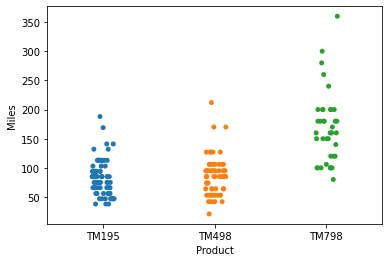

In [68]:
#Product vs Miles
sns.stripplot(data = CardFit1, x='Product', y='Miles', jitter=True)

Observations: This is very similar to the Product vs Usage stripplot.

# Conclusions
For all TM models, partnered users are more likely.
For all TM models, the age range is between 18 and 50 years old with the majority (50%) of users between 24-34 years old.
For TM models 195 and 498, both male and female users are equally likely. But with TM798, male users are much more likely.
For TM798, we are more likely to have higher educated individuals with higher incomes. These individuals also have more intent to use the TM798.


# Recommendations
For TM798, target highly educated/high income males who are also "extreme" athletes since they seem to more likely to purchase the TM798.

For TM195, target lower educated individuals with lower incomes of both sexes and low to mid-levels of expected usage. 

For TM498, target higher educated/high income individuals with lower levels of expected usage and low to mid-levels of fitness.

For all products, partnered users are more likely so the suburbs are a better option for finding buyers since it is more likely to have young families (partnered) living there.